# This notebook compares the results from Thermobar to those calculated using the spreadsheet provided in the supporting information of https://www.sciencedirect.com/science/article/pii/S0012825218300631?casa_token=9JtvtPJM7CIAAAAA:pWMCfGo2CR0C6c5GJk-WYCr0QxEnUMfA02Y86Vqp2vaZqMw6-nvQVqv6dGqMPiKYyT6ts83N#s0120




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

In [2]:
out=pt.import_excel('Mollo_2018_Supplement.xlsx', sheet_name="ForPython")
my_input=out['my_input']
myCPXs1=out['Cpxs']
myLiquids1=out['Liqs']
myCPXs1.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,49.5021,1.1413,3.9358,7.2288,0.1640,14.2628,22.7553,0.3559,0.0,0.0029,0
1,48.1179,1.2681,5.2168,7.7023,0.1640,13.7139,23.0463,0.3437,0.0,0.0161,1
2,48.4217,1.3198,4.8030,7.7151,0.1614,13.5614,23.0491,0.4098,0.0,0.0512,2
3,48.6228,1.4933,4.7142,8.1654,0.1769,13.4354,22.5720,0.4206,0.0,0.0088,3
4,47.2173,1.5183,6.3335,6.9625,0.1240,13.3508,23.1849,0.3154,0.0,0.0307,4


## Equation T_Mollo2018_eq33MAM

In [3]:
P_only =pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mollo2018_AMAM", T=my_input['T_K'])
P_only

0     2.513794
1     2.662231
2     2.978299
3     3.122275
4     2.790060
        ...   
88    2.912395
89    2.941407
90    2.884782
91    2.757679
92    2.881192
Length: 93, dtype: float64

Text(0, 0.5, 'My P - Their P')

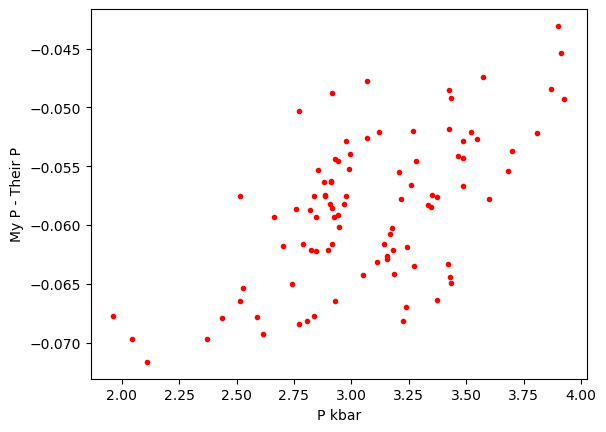

In [4]:
plt.plot(P_only, P_only-my_input['P_Mpa']/100, '.r')
plt.xlabel('P kbar')
plt.ylabel('My P - Their P')

In [10]:
T_only =pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Mollo2018_eq33MAM", P=my_input['P_Mpa']/100)
T_only

0     1330.659716
1     1329.466451
2     1335.964032
3     1335.558743
4     1330.277339
         ...     
88    1324.603967
89    1326.474233
90    1324.860224
91    1321.568709
92    1324.656891
Length: 93, dtype: float64

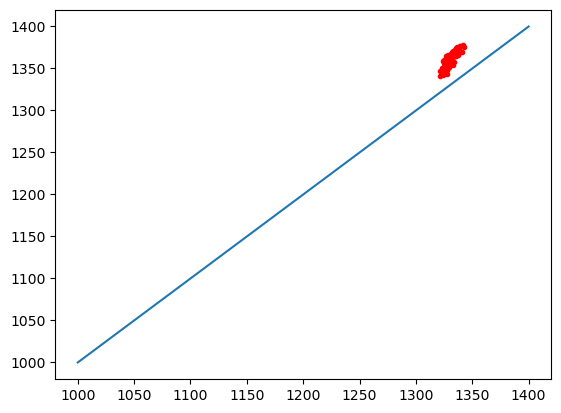

In [12]:
plt.plot(T_only, my_input['T_K'], '.r')
plt.plot([1000, 1400], [1000, 1400])

Text(0, 0.5, 'My T - Their T')

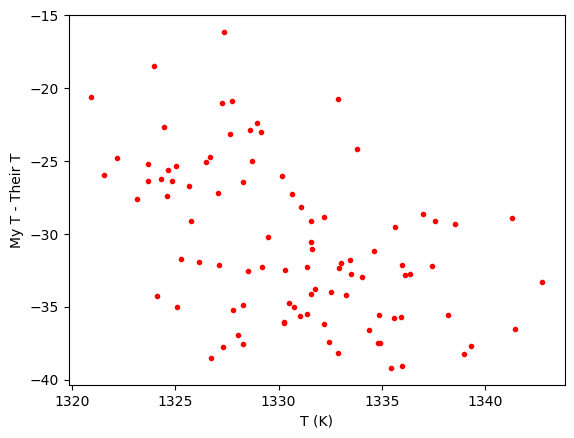

In [11]:
plt.plot(T_only, T_only-my_input['T_K'], '.r')
plt.xlabel('T (K)')
plt.ylabel('My T - Their T')

In [6]:
Iter =pt.calculate_cpx_liq_press_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mollo2018_AMAM", equationT="T_Mollo2018_eq33MAM")
Iter

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter
0,1.401482,1330.659716,0.0,0.0
1,1.429656,1329.466451,0.0,0.0
2,1.664610,1335.964032,0.0,0.0
3,1.658911,1335.558743,0.0,0.0
4,1.319969,1330.277339,0.0,0.0
...,...,...,...,...
88,1.794188,1324.603967,0.0,0.0
89,1.917381,1326.474233,0.0,0.0
90,1.808543,1324.860224,0.0,0.0
91,1.698130,1321.568709,0.0,0.0


In [7]:
FixedT_Put2008_eq32a =pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mollo2018_eqAMAM", T=1400)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq32a']), np.max(my_input['FixedT_P_Put2008_eq32a'])), (np.min(my_input['FixedT_P_Put2008_eq32a']), np.max(my_input['FixedT_P_Put2008_eq32a'])), '-r')
ax1.plot(FixedT_Put2008_eq32a, my_input['FixedT_P_Put2008_eq32a'], 'ok')
ax2.plot(FixedT_Put2008_eq32a, 1000*(FixedT_Put2008_eq32a-my_input['FixedT_P_Put2008_eq32a']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

ValueError: P_Mollo2018_eqAMAM is not a valid equation

# Equation 32b Putirka 2008
- Slightly strange, as requires users to enter a water content (so requires some guess of the liquid). 
- If nothing is entered, it performs calculations for H2O=0
- If users enter "fixed" it takes H2O_Liq from the cpx array so 1st users should append H2O onto this array as below
- Users can also enter a constant value like H2O_Liq=4

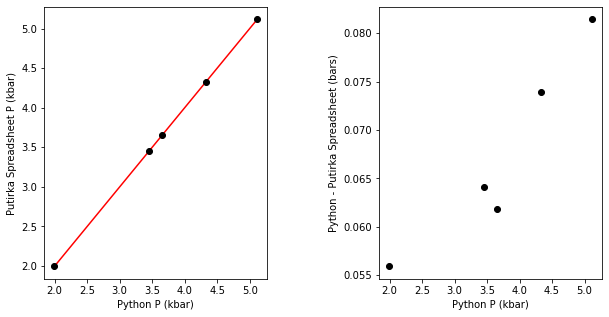

In [5]:
myCPXs1['H2O_Liq']=myLiquids1['H2O_Liq']
myCPXs1['T_K']=my_input['T_K']
FixedT_Put2008_eq32b =pt.calculate_cpx_only_press(cpx_comps=myCPXs1, equationP="P_Put2008_eq32b", T=1400, H2O_Liq=myLiquids1['H2O_Liq'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq32b']), np.max(my_input['FixedT_P_Put2008_eq32b'])), (np.min(my_input['FixedT_P_Put2008_eq32b']), np.max(my_input['FixedT_P_Put2008_eq32b'])), '-r')
ax1.plot(FixedT_Put2008_eq32b, my_input['FixedT_P_Put2008_eq32b'], 'ok')
ax2.plot(FixedT_Put2008_eq32b, 1000*(FixedT_Put2008_eq32b-my_input['FixedT_P_Put2008_eq32b']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Cpx-only temperature

## Equation 32d Putirka

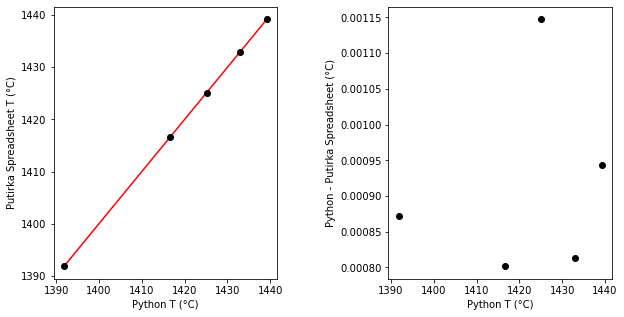

In [6]:
P_dep_Put2008_eq32d=pt.calculate_cpx_only_temp(cpx_comps=myCPXs1, equationT="T_Put2008_eq32d", P=my_input['P_kbar'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_P_Putirka_eq32d']), np.max(my_input['FixedP_P_Putirka_eq32d'])), (np.min(my_input['FixedP_P_Putirka_eq32d']), np.max(my_input['FixedP_P_Putirka_eq32d'])), '-r')
ax1.plot(P_dep_Put2008_eq32d, my_input['FixedP_P_Putirka_eq32d'], 'ok')
ax2.plot(P_dep_Put2008_eq32d, P_dep_Put2008_eq32d-my_input['FixedP_P_Putirka_eq32d'], 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)